<a href="https://colab.research.google.com/github/Angana007/machine_learning_classwork/blob/main/classwork_ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

# Majority voting/Hard voting

Imagine you're voting on a favorite color. You have a group of friends who each vote for a different color. To decide the winner, you count all the votes and choose the color that gets the most votes.

That's essentially what Majority Voting or Hard Voting does in machine learning. It's like a group of friends (or models) voting on whether a data point belongs to one category or another. The color (or category) that gets the most votes wins.

So, if you have several models predicting whether a person is likely to buy a product, and most of the models say "yes," then the final prediction will be "yes."

In [2]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [3]:
display(data)

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

In [5]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [8]:
# Check for missing values
# Check for question marks
question_marks = data.isin(['?']).sum()
print(question_marks)

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [11]:
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [12]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [13]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [14]:
# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as the target variable

In [15]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [16]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [17]:
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression()),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
]



In [18]:
# Create Voting Classifier ensemble with estimators
ensemble = VotingClassifier(estimators, voting="hard")

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Evaluate ensemble model using cross-validation
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)

# Print mean accuracy score of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results.mean():.2f}")

# Fit the ensemble on the scaled training set and evaluate on the scaled test set
ensemble.fit(X_train_scaled, y_train)
test_accuracy = ensemble.score(X_test_scaled, y_test)

# Print test accuracy
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Mean cross-validation accuracy of the ensemble model: 0.96
Test accuracy of the ensemble model: 0.96


-------Classification report--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

-------Confusion matrix-------------


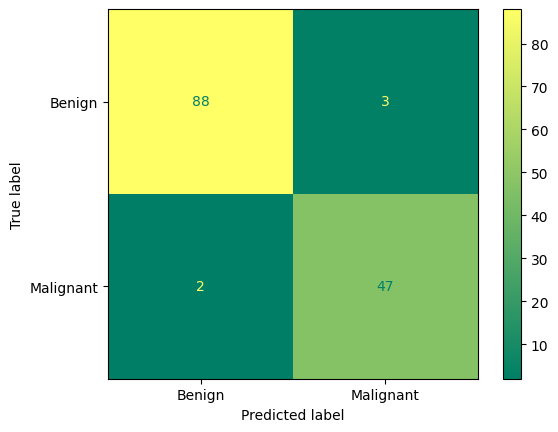

In [19]:
## evaluating model on test dataset
y_pred = ensemble.predict(X_test_scaled)
print('-------Classification report--------')
print(classification_report(y_test,y_pred))
print('-------Confusion matrix-------------')

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap="summer")
plt.show()


# Weighted Voting/Soft Voting

Imagine you're voting on a movie. Instead of each person getting one vote, some people might have more "weight" in their votes, like a movie critic. This is similar to weighted voting.

Soft voting is like this, but instead of votes, it uses probabilities. Each model, like a critic, gives a probability for how likely it thinks a movie is good or bad. These probabilities are like weighted votes.

The final decision isn't just about who has the most votes, but also about how strongly they feel about their choice. The movie with the highest average probability from all the "critics" (models) is chosen.

# Averaging

Imagine you're trying to guess someone's age. You ask three friends for their guesses. One friend says 30, another says 35, and the last one says 32. Instead of picking just one guess, you decide to take the average of all three. So, you add 30, 35, and 32 together and divide by 3. The average is 32.33.

This is basically what averaging does in machine learning. Instead of relying on just one model's prediction, we combine the predictions from multiple models. This helps to smooth out any errors that any single model might make, giving us a more reliable overall prediction.

# Weighted Averaging

Imagine you're baking a cake. You have three different recipes, each with its own strengths and weaknesses. To get the best possible cake, you don't just average all the recipes together equally. Instead, you might give more weight to the recipe from a renowned chef or one that has consistently produced delicious results in the past.

This is essentially what weighted averaging does. Instead of treating all models equally, it assigns different levels of importance, or "weights," to each model's prediction. Models that have performed better in the past or are more reliable are given higher weights. This means their predictions have a bigger impact on the final outcome.

Example:

Medical diagnosis: If a doctor has a blood test, an MRI, and a physical exam to diagnose a patient, they might give more weight to the MRI results because it's often more accurate for certain conditions. So, the MRI's prediction would have a bigger impact on the final diagnosis.
By assigning different weights to each model's prediction, weighted averaging can help you make more accurate and reliable decisions. It's like combining the expertise of multiple people, with each person's opinion weighted based on their knowledge and experience.